<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

In [5]:
#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

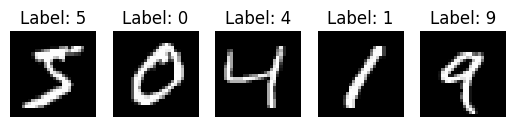

In [6]:
import matplotlib.pyplot as plt

# Display the first few images from the training dataset
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [8]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Create a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten the 28x28 input images
    Dense(128, activation='relu'),   # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),    # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) and softmax activation
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model for at least 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2466 - accuracy: 0.9276 - val_loss: 0.1269 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.0948 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735 - accuracy: 0.9765 - val_loss: 0.0916 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0695 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0728 - val_accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0746 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.0798 - val_accurac

In [12]:
# Train the model for a sufficient number of epochs to observe overfitting
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.1042 - val_accuracy: 0.9765
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0929 - val_accuracy: 0.9782
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0976 - val_accuracy: 0.9800
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0962 - val_accuracy: 0.9795
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 0.1058 - val_accuracy: 0.9795
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.1224 - val_accuracy: 0.9766
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.1099 - val_accuracy:

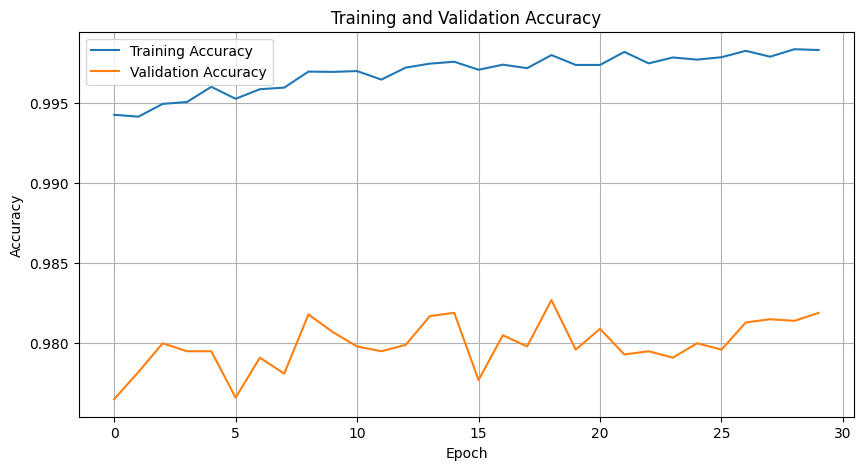

In [13]:
# Plot training and validation accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
base_folder_path = '/content/drive/MyDrive/assignment_1_tme'
os.listdir(base_folder_path)

['Screen Shot 2023-10-06 at 2.35.31 AM.png',
 'Screen Shot 2023-10-06 at 2.35.40 AM.png',
 'Screen Shot 2023-10-06 at 2.35.49 AM.png',
 'Screen Shot 2023-10-06 at 2.35.58 AM.png',
 'Screen Shot 2023-10-06 at 2.36.06 AM.png',
 'Screen Shot 2023-10-06 at 2.36.13 AM.png',
 'Screen Shot 2023-10-06 at 2.36.20 AM.png',
 'Screen Shot 2023-10-06 at 2.36.27 AM.png',
 'Screen Shot 2023-10-06 at 2.36.36 AM.png',
 'Screen Shot 2023-10-06 at 2.36.45 AM.png',
 'Screen Shot 2023-10-06 at 2.39.38 AM.png',
 'Screen Shot 2023-10-06 at 2.39.45 AM.png',
 'Screen Shot 2023-10-06 at 2.39.54 AM.png',
 'Screen Shot 2023-10-06 at 2.40.02 AM.png',
 'Screen Shot 2023-10-06 at 2.40.08 AM.png',
 'Screen Shot 2023-10-06 at 2.40.15 AM.png',
 'Screen Shot 2023-10-06 at 2.40.21 AM.png',
 'Screen Shot 2023-10-06 at 2.40.29 AM.png',
 'Screen Shot 2023-10-06 at 2.41.12 AM.png',
 'Screen Shot 2023-10-06 at 2.41.20 AM.png',
 'IMG_6171.heic',
 'IMG_6168.heic',
 'IMG_6166.heic',
 'IMG_6165.heic',
 'IMG_6174.heic',
 'IMG_6169

In [16]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/assignment_1_tme'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.heic'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/assignment_1_tme/0
filename Screen Shot 2023-10-06 at 2.35.31 AM.png
filename Screen Shot 2023-10-06 at 2.39.38 AM.png
filename IMG_6165.png
/content/drive/MyDrive/assignment_1_tme/1
filename Screen Shot 2023-10-06 at 2.35.40 AM.png
filename Screen Shot 2023-10-06 at 2.39.45 AM.png
filename IMG_6166.png
/content/drive/MyDrive/assignment_1_tme/2
filename Screen Shot 2023-10-06 at 2.35.49 AM.png
filename Screen Shot 2023-10-06 at 2.39.54 AM.png
filename IMG_6167.png
/content/drive/MyDrive/assignment_1_tme/3
filename Screen Shot 2023-10-06 at 2.35.58 AM.png
filename Screen Shot 2023-10-06 at 2.40.02 AM.png
filename IMG_6168.png
/content/drive/MyDrive/assignment_1_tme/4
filename Screen Shot 2023-10-06 at 2.36.06 AM.png
filename Screen Shot 2023-10-06 at 2.40.08 AM.png
filename IMG_6169.png
/content/drive/MyDrive/assignment_1_tme/5
filename Screen Shot 2023-10-06 at 2.36.13 AM.png
filename Screen Shot 2023-10-06 at 2.40.15 AM.png
filename IMG_6170.png
/content/drive/M

In [17]:
custom_images

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [18]:
display_image = custom_images[3] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

In [19]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [20]:
display_image = x_train[-1] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

In [21]:
len(x_train),len(x_test)

(60030, 10000)

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:

print(test_acc)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
custom_test_images = []
custom_test_labels = []
folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1_Custom_Test_Data'
for filename in os.listdir(folder_path):
  print('filename : ', filename)
  if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.jpeg'):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    threshold = 100
    img = img.point(lambda p: p > threshold and 255)
    img_array = np.array(img)
    custom_test_images.append(img_array)
    custom_test_labels.append(int(filename[0]))

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)

In [ ]:
custom_test_labels, len(custom_test_labels)

In [ ]:
custom_test_pred=model.predict(custom_test_images)

In [ ]:
for i in range(len(custom_test_pred)):
  print(custom_test_labels[i],np.argmax(custom_test_pred[i]))